<a href="https://colab.research.google.com/github/GustavoBD-Dev/neuronalnetworks/blob/main/RedesNeuronalesConvolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes neuronales convolucionales
Clasificación avanzada de imagenes con IA/ML.

Importamos las librerias necesarias

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

## Obtenemos el set de datos separando en entrenamiento y prueba

In [3]:
# Separamos los datos
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

# 
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

# Hacer 'one-hot encoding' de los resultados
# (e.g en lugar de tener como resultado una sola neurona, se tienen 10 donde solo
#   el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

# Convertir en flotante y normalizar para que aprenda mejor la red 
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

11501568/11490434 [==============================] - 0s 0us/step


## Visualización de imagenes del set

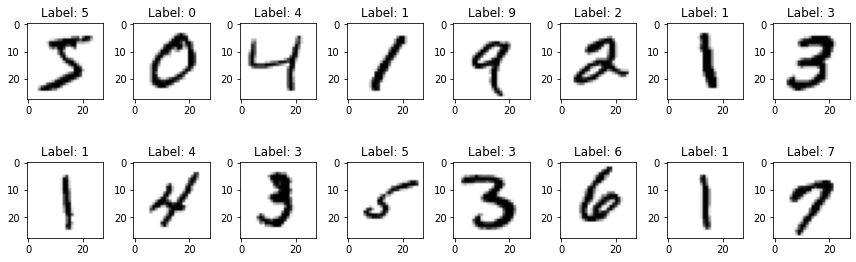

In [4]:
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
  ax = axes[i//columnas, i%columnas]
  ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
  ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

## Aumento de datos y tranformaciones

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# variables para control de las transformaciones para el aumento de datos
rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_acercamiento = [0.5, 1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range = rango_acercamiento
)

datagen.fit(X_entrenamiento)

## Visualizacion de las imagenes de dataset antes y despues de las tranformaciones

ANTES:



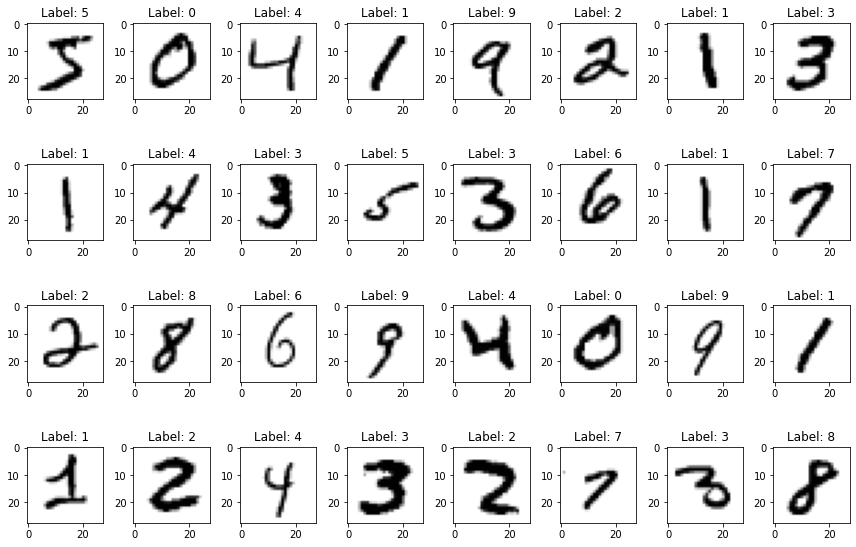

DESPUES:



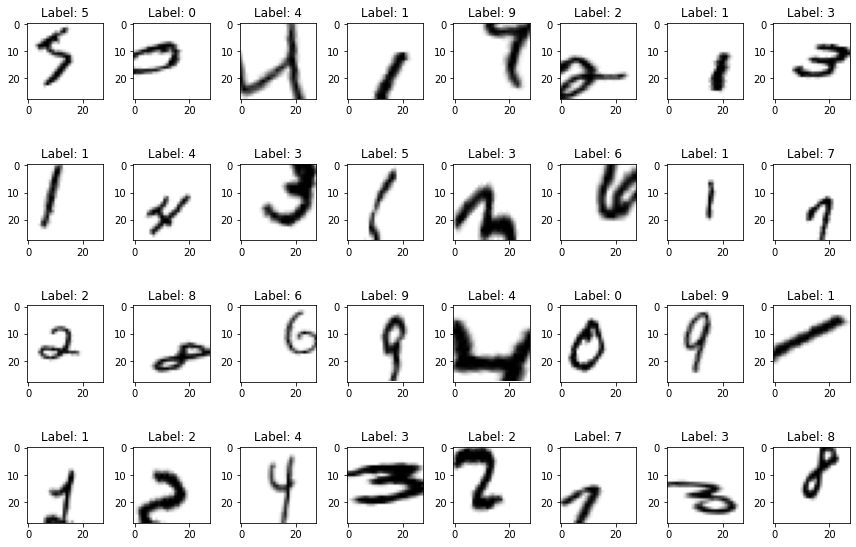

In [6]:
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
  ax = axes1[i//columnas, i%columnas]
  ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
  ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento, Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10), batch_size=num, shuffle=False):
  for i in range(0, num):
    ax = axes2[i//columnas, i%columnas]
    ax.imshow(X[i].reshape(28,28), cmap='gray_r')
    ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
  break
plt.tight_layout()
plt.show()


#Modelo

Agregar al modelo una capa de convolución

`tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1))`
1.   `32` - Numero de nucleos a utilizar
2.   `(3,3)` - Tamaño de los nucleos
3.   `input_shape=(28,28,1)` - Tamaño de la imagen de entrada y numero de canales


In [7]:
modelo = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilamos el modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

## Entrenamiento

In [9]:
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [10]:
TAMANIO_LOTE = 32
print('Entrenando modelo ...')
epocas = 60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs = epocas,
    batch_size = TAMANIO_LOTE,
    validation_data = (X_pruebas, Y_pruebas),
    steps_per_epoch = int(np.ceil(60000 / float(TAMANIO_LOTE))),
    validation_steps = int(np.ceil(10000 / float(TAMANIO_LOTE)))
)

print('Modelo entrenado')

Entrenando modelo ...
Epoch 1/60
1875/1875 [==============================] - 46s 24ms/step - loss: 1.3801 - accuracy: 0.5320 - val_loss: 0.2210 - val_accuracy: 0.9455
Epoch 2/60
1875/1875 [==============================] - 45s 24ms/step - loss: 0.8400 - accuracy: 0.7286 - val_loss: 0.1501 - val_accuracy: 0.9623
Epoch 3/60
1875/1875 [==============================] - 45s 24ms/step - loss: 0.6980 - accuracy: 0.7752 - val_loss: 0.1092 - val_accuracy: 0.9683
Epoch 4/60
1875/1875 [==============================] - 44s 24ms/step - loss: 0.6271 - accuracy: 0.7963 - val_loss: 0.0993 - val_accuracy: 0.9705
Epoch 5/60
1875/1875 [==============================] - 45s 24ms/step - loss: 0.5732 - accuracy: 0.8139 - val_loss: 0.1056 - val_accuracy: 0.9703
Epoch 6/60
1875/1875 [==============================] - 44s 24ms/step - loss: 0.5449 - accuracy: 0.8240 - val_loss: 0.0904 - val_accuracy: 0.9721
Epoch 7/60
1875/1875 [==============================] - 48s 25ms/step - loss: 0.5313 - accuracy: 0.828

Graficación de la magnitud de perdida

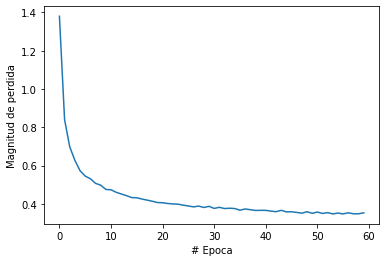

In [11]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(history.history["loss"])

# Predicción
Guardamos el modelo en un archivo h5

In [12]:
modelo.save('numeros_conv.h5')
modelo.save_weights('pesos_numeros_conv.h5')

Los archivos se encuentran en `numeros_conv.h5` y `numeros_conv.h5`. Los podemos observar con el comando `ls`.

In [13]:
!ls

numeros_conv.h5  pesos_numeros_conv.h5	sample_data


Realizamos la predicción con el set de datos de pruebas, mostramos la imagen y la prediccion que ha generado el modelo.

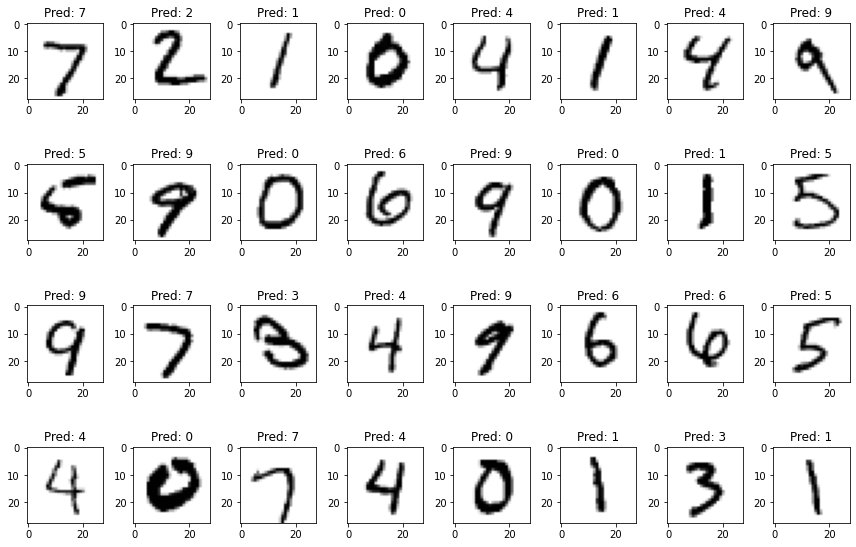

In [32]:
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
  ax = axes1[i//columnas, i%columnas]
  ax.imshow(X_pruebas[i].reshape(28,28), cmap='gray_r')

  imagen = X_pruebas[i]
  imagen = np.array([imagen])
  prediccion = modelo.predict(imagen)

  ax.set_title('Pred: {}'.format(str(np.argmax(prediccion[0]))))
plt.tight_layout()
plt.show()

